           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

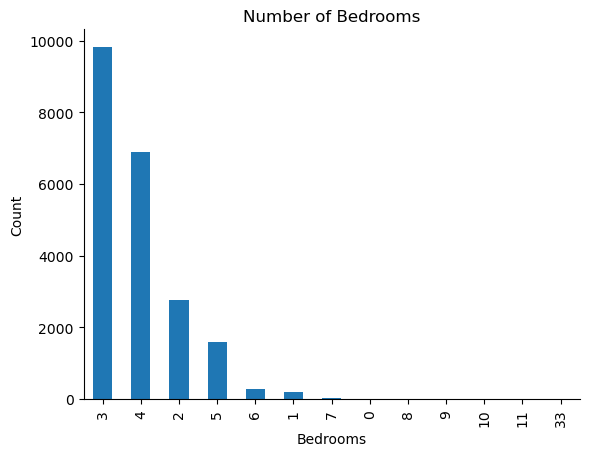

<Figure size 1000x1000 with 0 Axes>

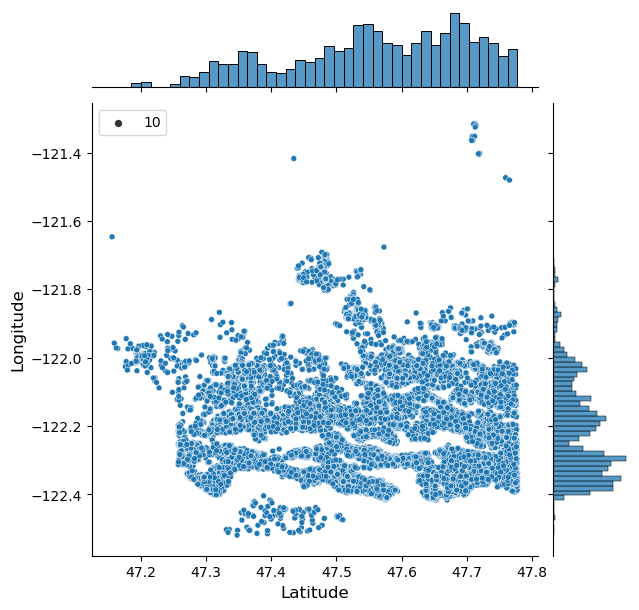

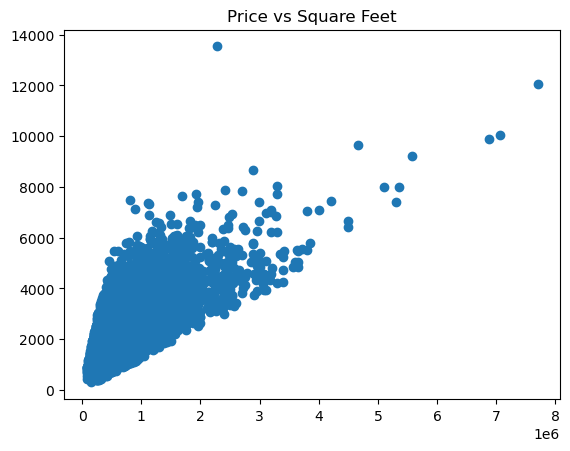

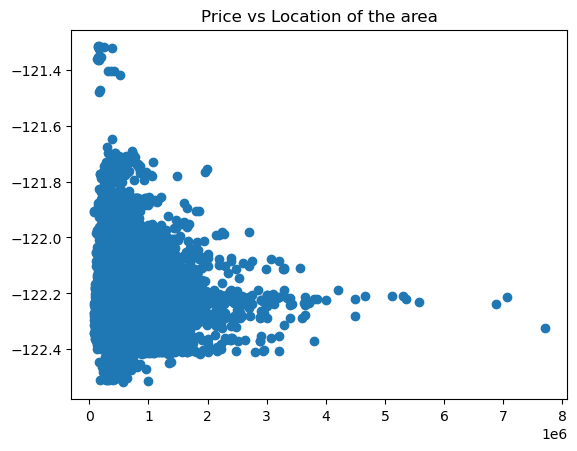

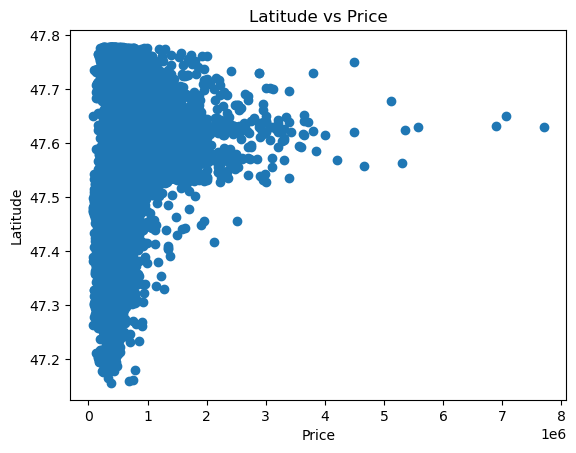

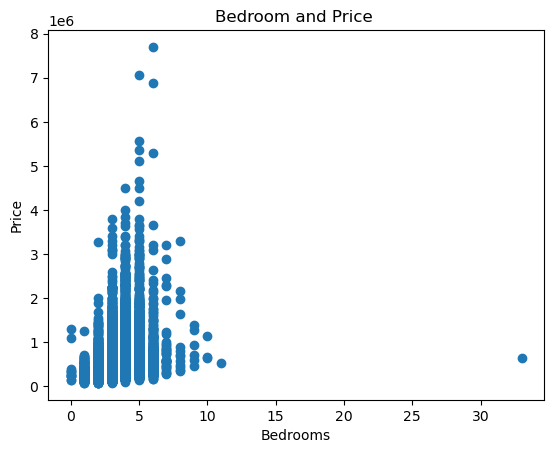

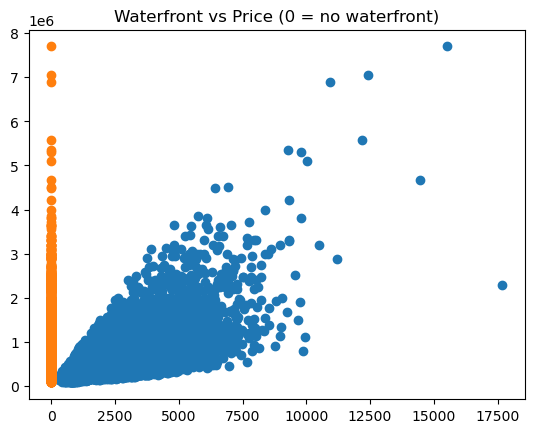

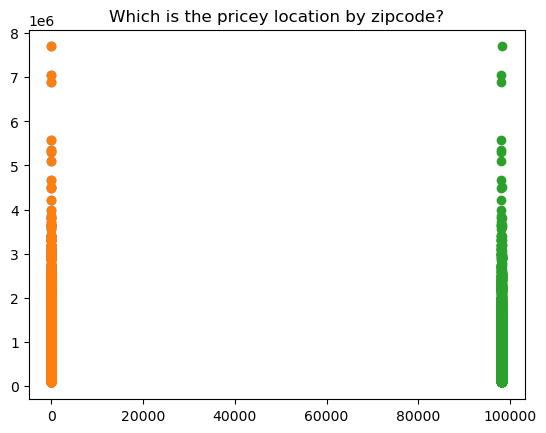

Linear Regression Score: 0.7320342760357688


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


%matplotlib inline

# Load the dataset
data = pd.read_csv("kc_house_data.csv")

# Display the first few rows of the dataset
print(data.head())

# Display summary statistics of the dataset
print(data.describe())

# Visualize the distribution of the number of bedrooms
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()
plt.show()

# Visualize the geographical distribution using a joint plot
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

# Scatter plots for various features
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")
plt.show()

plt.scatter(data.price, data.long)
plt.title("Price vs Location of the area")
plt.show()

plt.scatter(data.price, data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")
plt.show()

plt.scatter(data.bedrooms, data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

# More scatter plots
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price (0 = no waterfront)")
plt.show()

plt.scatter(data.floors, data.price)
plt.scatter(data.condition, data.price)
plt.scatter(data.zipcode, data.price)
plt.title("Which is the pricey location by zipcode?")
plt.show()

# Linear Regression
reg = LinearRegression()
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'], axis=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

# Fit the linear regression model
reg.fit(x_train, y_train)

# Evaluate the linear regression model
print("Linear Regression Score:", reg.score(x_test, y_test))

# Gradient Boosting Regression
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
                                        learning_rate=0.1, loss='squared_error')
clf.fit(x_train, y_train)

# Initialize an array to store test scores
t_sc = np.zeros((clf.n_estimators,), dtype=np.float64)

# Enumerate through the staged predictions and calculate the MSE for each stage
for i, y_pred_stage in enumerate(clf.staged_predict(x_test)):
    t_sc[i] = mean_squared_error(y_test, y_pred_stage)

# Generate an array of test stage indices
testsc = np.arange(clf.n_estimators) + 1

# Plotting the training and testing scores for Gradient Boosting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc, clf.train_score_, 'b-', label='Set dev train')
plt.plot(testsc, t_sc, 'r-', label='Set dev test')
plt.legend()
plt.xlabel('Number of Boosting Stages')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error')
plt.show()
